# Christian Gunther Code

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import scipy.fftpack
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline
sns.set()
import gmplot
import math

## Load and Clean the Data

In [3]:
#load 2017 data
df_1 = pd.read_csv('data/green_tripdata_2017-01.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_2 = pd.read_csv('data/green_tripdata_2017-02.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_3 = pd.read_csv('data/green_tripdata_2017-03.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_4 = pd.read_csv('data/green_tripdata_2017-04.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_5 = pd.read_csv('data/green_tripdata_2017-05.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_6 = pd.read_csv('data/green_tripdata_2017-06.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_7 = pd.read_csv('data/green_tripdata_2017-07.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_8 = pd.read_csv('data/green_tripdata_2017-08.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_9 = pd.read_csv('data/green_tripdata_2017-09.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_10 = pd.read_csv('data/green_tripdata_2017-10.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_11 = pd.read_csv('data/green_tripdata_2017-11.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")
df_12 = pd.read_csv('data/green_tripdata_2017-12.csv', parse_dates = ["lpep_pickup_datetime"],index_col="lpep_pickup_datetime")

In [4]:
#concatenate the data
month_data = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12]
df = pd.concat(month_data)

In [5]:
#clean data
df = df['2017']

In [6]:
#list of zones and their boroughs
taxi_zones = pd.read_csv('data/taxi_zone_lookup.csv')

In [7]:
#Create a dictionary with each zone being a key to a certain borough
bor_dict = {}
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'EWR', 'Unknown']
for b in boroughs:
    bor_dict[b] = []
for index, row in taxi_zones.iterrows():
    bor_dict[row['Borough']].append(index + 1)

## Find top 20 zones in each borough

In [10]:
#locations_year holds tuple with each zone and its count for 2017
locations_year = [0]*266
for index, row in df.iterrows():
    locations_year[row['PULocationID']] += 1

#Get top 20 zones with highest counts from 2017
top20_year = []
for i, b in enumerate(boroughs):
    top20_year.append([])
    for zone in bor_dict[b]:
        top20_year[i].append((zone, locations_year[zone]))
    top20_year[i].sort(key=lambda x: x[1], reverse=True)
    top20_year[i] = top20_year[i][:20]

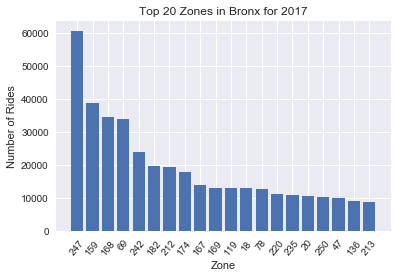

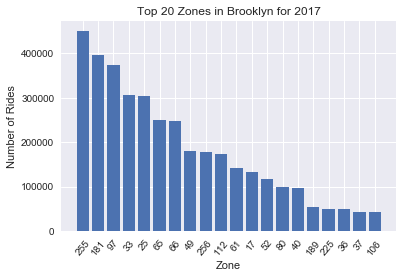

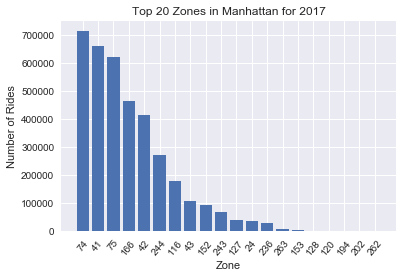

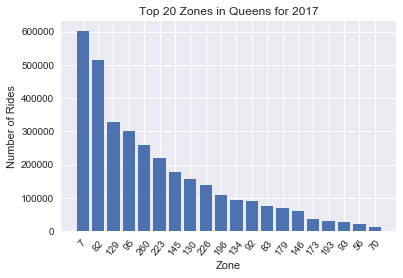

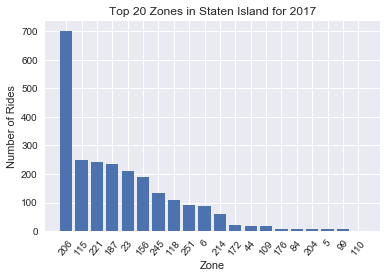

In [35]:
#Plot the top 20 zones for each borough for 2017
for i, b in enumerate(boroughs):
    if i == 5 or i == 6:
        continue
    plt.title('Top 20 Zones in {} for 2017'.format(boroughs[i]))
    plt.bar(range(len(top20_year[i])), [val[1] for val in top20_year[i]], align='center')
    plt.xticks(range(len(top20_year[i])), [val[0] for val in top20_year[i]])
    plt.xticks(rotation=50)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.xlabel('Zone')
    plt.ylabel('Number of Rides')
    plt.savefig('top20zones2017_{}.jpg'.format(boroughs[i]))
    plt.show()

## Find Number of Rides for different Times of Day

In [11]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

### January

In [13]:
#Calculate counts for different times in top 10 zones of each borough
#time slots split up into 4 hour shifts 0-4, 4-8, 8-12, 12-16, 16-20, 20-24
top10zones_1 = []
timetop10_1 = []
for i, b in enumerate(boroughs):
    top10zones_1.append(top20_year[i][:10])
    top10zones_1[i] = [x[0] for x in top10zones_1[i]]
    indices = {}
    for num, z in enumerate(top10zones_1[i]):
        indices[z] = num
    
    timetop10_1.append(np.zeros((10,6)))
    for index, row in df_1.iterrows():
        PUzone = row['PULocationID']
        if PUzone not in indices:
            continue
        TOD = int(index.hour/4)
        z = indices[PUzone]
        timetop10_1[i][z][TOD] += 1

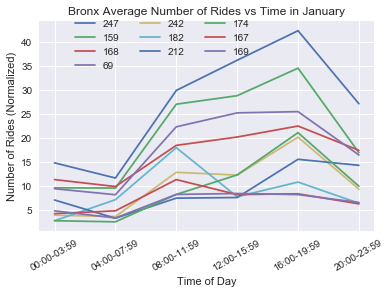

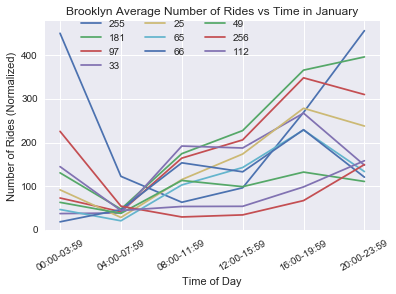

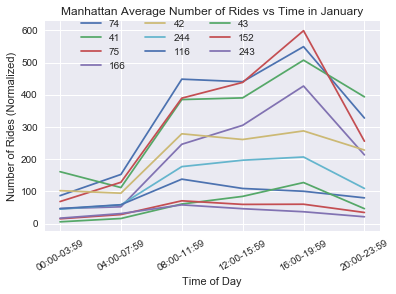

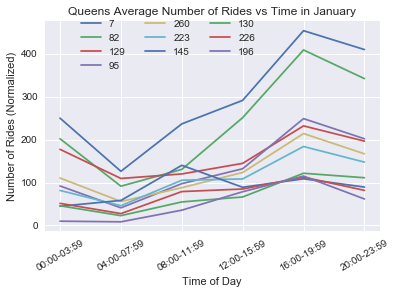

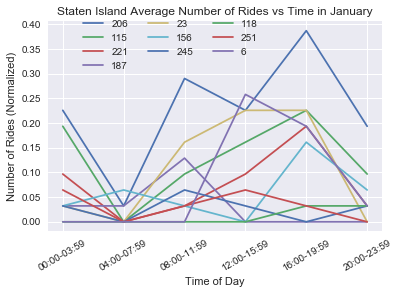

In [29]:
for i, b in enumerate(boroughs):
    if i > 4:
        continue
    plt.title('{} Average Number of Rides vs Time in {}'.format(boroughs[i], months[0]))
    for x in range(10):
        plt.plot(timetop10_1[i][x]/31)
    plt.legend(top10zones_1[i], loc='upper left', bbox_to_anchor=(0.08, 1.05), ncol=3, fancybox=True, shadow=True)
    xticks(np.arange(6), ('00:00-03:59', '04:00-07:59', '08:00-11:59', '12:00-15:59', '16:00-19:59', '20:00-23:59'))
    plt.xticks(rotation=30)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Rides (Normalized)')
    plt.savefig('TimeOfDay_{}_{}.jpg'.format(months[0], boroughs[i]))
    plt.show()

### February

In [19]:
#Calculate counts for different times in top 10 zones of each borough for first month
#time slots split up into 4 hour shifts 0-4, 4-8, 8-12, 12-16, 16-20, 20-24
top10zones_2 = []
timetop10_2 = []
for i, b in enumerate(boroughs):
    top10zones_2.append(top20_year[i][:10])
    top10zones_2[i] = [x[0] for x in top10zones_2[i]]
    indices = {}
    for num, z in enumerate(top10zones_2[i]):
        indices[z] = num
    
    timetop10_2.append(np.zeros((10,6)))
    for index, row in df_2.iterrows():
        PUzone = row['PULocationID']
        if PUzone not in indices:
            continue
        TOD = int(index.hour/4)
        z = indices[PUzone]
        timetop10_2[i][z][TOD] += 1

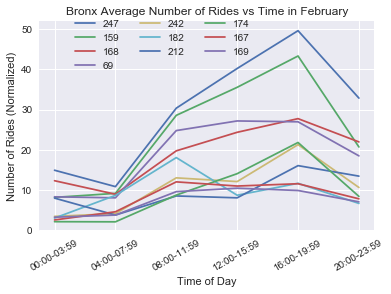

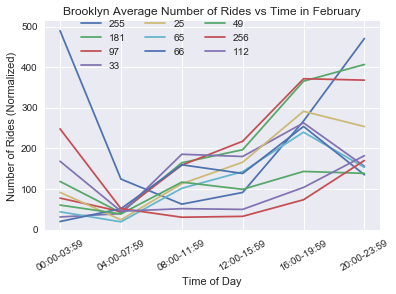

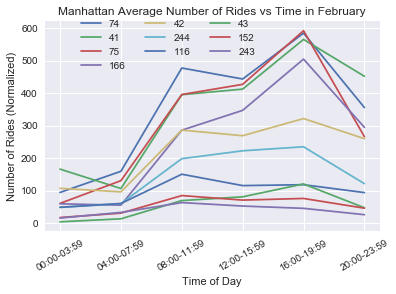

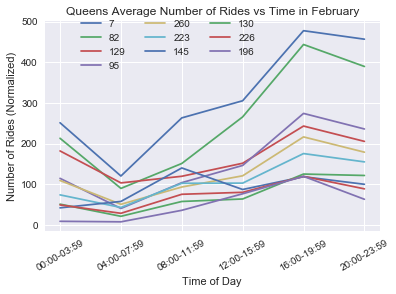

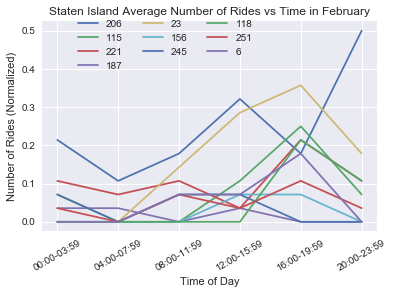

In [30]:
for i, b in enumerate(boroughs):
    if i > 4:
        continue
    plt.title('{} Average Number of Rides vs Time in {}'.format(boroughs[i], months[1]))
    for x in range(10):
        plt.plot(timetop10_2[i][x]/28)
    plt.legend(top10zones_2[i], loc='upper left', bbox_to_anchor=(0.08, 1.05), ncol=3, fancybox=True, shadow=True)
    xticks(np.arange(6), ('00:00-03:59', '04:00-07:59', '08:00-11:59', '12:00-15:59', '16:00-19:59', '20:00-23:59'))
    plt.xticks(rotation=30)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Rides (Normalized)')
    plt.savefig('TimeOfDay_{}_{}.jpg'.format(months[1], boroughs[i]))
    plt.show()

### March

In [20]:
#Calculate counts for different times in top 10 zones of each borough for first month
#time slots split up into 4 hour shifts 0-4, 4-8, 8-12, 12-16, 16-20, 20-24
top10zones_3 = []
timetop10_3 = []
for i, b in enumerate(boroughs):
    top10zones_3.append(top20_year[i][:10])
    top10zones_3[i] = [x[0] for x in top10zones_3[i]]
    indices = {}
    for num, z in enumerate(top10zones_3[i]):
        indices[z] = num
        
    timetop10_3.append(np.zeros((10,6)))
    for index, row in df_3.iterrows():
        PUzone = row['PULocationID']
        if PUzone not in indices:
            continue
        TOD = int(index.hour/4)
        z = indices[PUzone]
        timetop10_3[i][z][TOD] += 1

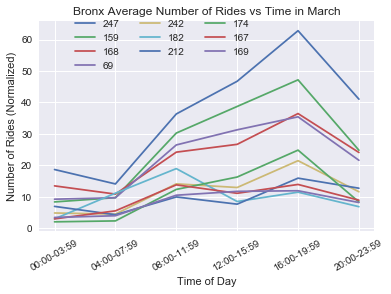

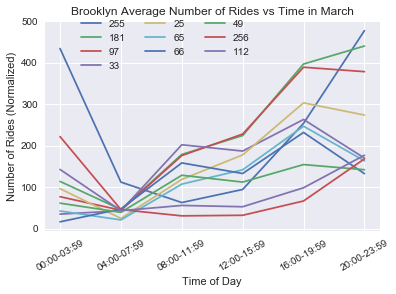

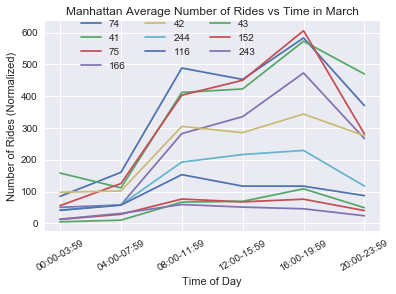

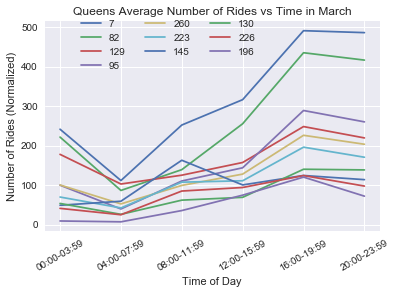

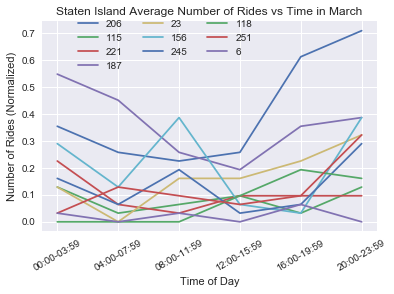

In [31]:
for i, b in enumerate(boroughs):
    if i > 4:
        continue
    plt.title('{} Average Number of Rides vs Time in {}'.format(boroughs[i], months[2]))
    for x in range(10):
        plt.plot(timetop10_3[i][x]/31)
    plt.legend(top10zones_3[i], loc='upper left', bbox_to_anchor=(0.08, 1.05), ncol=3, fancybox=True, shadow=True)
    xticks(np.arange(6), ('00:00-03:59', '04:00-07:59', '08:00-11:59', '12:00-15:59', '16:00-19:59', '20:00-23:59'))
    plt.xticks(rotation=30)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Rides (Normalized)')
    plt.savefig('TimeOfDay_{}_{}.jpg'.format(months[2], boroughs[i]))
    plt.show()

## Compare Trip Distance with Fare Amount

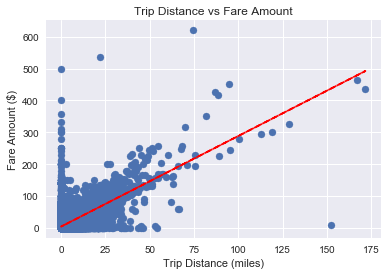

In [34]:
#Compare trip distance to fare amount
x = df_1['trip_distance']
y = df_1['fare_amount']
xy = zip(x,y)
xnew = []
ynew = []
for item in xy:
    if item[0] >= 0 and item[1] >= 0:
        xnew.append(item[0])
        ynew.append(item[1])

plt.scatter(xnew, ynew)

z = np.polyfit(xnew, ynew, 1)
p = np.poly1d(z)
plt.plot(xnew,p(xnew),"r--")
plt.title('Trip Distance vs Fare Amount')
xlabel('Trip Distance (miles)')
ylabel('Fare Amount ($)')
plt.savefig('TripDistancevsFareAmount.jpg')
plt.show()

## Average Trip Distance in Top 20 Zones of each Borough

In [24]:
#distances is a tuple of total trip distances and number of trips for each zone for first month
distances = [(0,0)]*266
count = 0
for index, row in df.iterrows():
    PUzone = row['PULocationID']
    cur_dist = row['trip_distance']
    
    overall_dist = distances[PUzone][0]
    overall_count = distances[PUzone][1]
    distances[PUzone] = (overall_dist + cur_dist, overall_count + 1)

In [25]:
#compute average distance per trip for each zone
avg = []
for i, d in enumerate(distances):
    if d[1] == 0:
        avg.append(0)
    else:
        avg.append(d[0]/d[1])

In [26]:
#Get top 20 zones with highest avg trip distances from first month
top20_dist = []
for i, b in enumerate(boroughs):
    top20_dist.append([])
    for zone in bor_dict[b]:
        top20_dist[i].append((zone, avg[zone]))
    top20_dist[i].sort(key=lambda x: x[1], reverse=True)
    top20_dist[i] = top20_dist[i][:20]

## Compute Average Trip Distance for All Zones and Top 20 Zones in each Borough

In [43]:
all_dist = []
for i, b in enumerate(boroughs):
    all_dist.append([])
    for zone in bor_dict[b]:
        all_dist[i].append((zone, avg[zone]))
    #top20_dist[i].sort(key=lambda x: x[1], reverse=True)
    #top20_dist[i] = top20_dist[i][:20]

In [47]:
all_avg_dist = []
for i, b in enumerate(boroughs):
    sum = 0
    for x in all_dist[i]:
        sum += x[1]
    all_avg_dist.append(1.0*sum/len(all_dist[i]))

In [46]:
top20_avg_dist = []
for i, b in enumerate(boroughs):
    sum = 0
    for x in top20_dist[i]:
        sum += x[1]
    top20_avg_dist.append(1.0*sum/len(top20_dist[i]))

In [54]:
x = zip(all_avg_dist, boroughs)
for y in x:
    print(y)

(3.4426379162510656, 'Bronx')
(3.7116471154248907, 'Brooklyn')
(2.782787017417318, 'Manhattan')
(4.726891579769845, 'Queens')
(3.957975489132591, 'Staten Island')
(2.0745161290322573, 'EWR')
(3.2078125949439866, 'Unknown')


In [55]:
x = zip(top20_avg_dist, boroughs)
for y in x:
    print(y)

(4.294676817641391, 'Bronx')
(5.075669300279946, 'Brooklyn')
(4.118402320070522, 'Manhattan')
(7.79618819745154, 'Queens')
(3.957975489132592, 'Staten Island')
(2.0745161290322573, 'EWR')
(3.2078125949439866, 'Unknown')


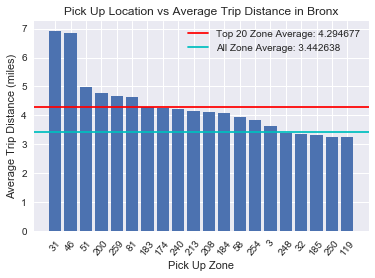

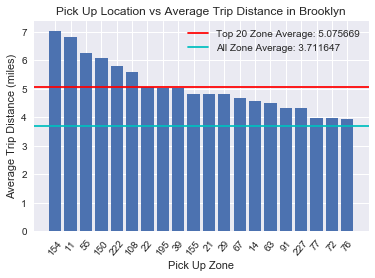

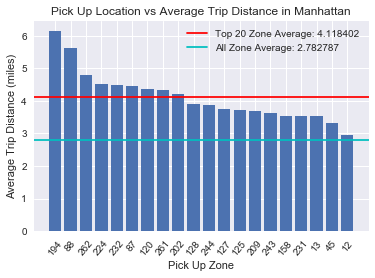

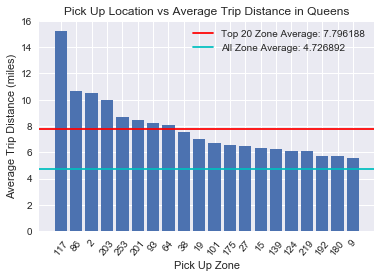

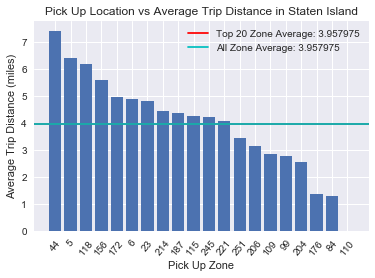

In [83]:
#Plot the top 20 zones with highest avg trip dist for each borough for first month
for i, b in enumerate(boroughs):
    if i == 5 or i == 6:
        continue
    plt.title('Pick Up Location vs Average Trip Distance in {}'.format(boroughs[i]))
    plt.bar(range(len(top20_dist[i])), [val[1] for val in top20_dist[i]], align='center')
    t20 = plt.axhline(top20_avg_dist[i], color='r')
    all = plt.axhline(all_avg_dist[i], color='c')
    tz = 'Top 20 Zone Average: {:f}'.format(top20_avg_dist[i])
    az = 'All Zone Average: {:f}'.format(all_avg_dist[i])
    handles = [t20, all]
    labels = [tz, az]
    plt.legend(handles, labels)
    plt.xticks(range(len(top20_dist[i])), [val[0] for val in top20_dist[i]])
    plt.xticks(rotation=50) 
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.xlabel('Pick Up Zone')
    plt.ylabel('Average Trip Distance (miles)')
    plt.savefig('PULvsDistance_{}.jpg'.format(boroughs[i]))
    plt.show()